In [ ]:
!pip install tiktoken lxml sentencepiece llama-index datasets sentence_transformers langchain 

In [ ]:
!pip install

# Naive RAG

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

#this for unzip and read the file
try:
    df=pd.read_csv("IMDB Dataset.csv")
except:
    !wget https://github.com/SalvatoreRa/tutorial/blob/main/datasets/IMDB.zip?raw=true
    !unzip IMDB.zip?raw=true

# Load the dataset
df = pd.read_csv("IMDB Dataset.csv")
df = df.iloc[:5000,:]

# Display the first few rows of the dataframe
print(df.head())

# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

# Fit and transform 
tfidf_matrix = tfidf_vectorizer.fit_transform(df['review'])

# Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())



                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [2]:
# Define the query
query = "I want to watch a movie about zombie"

# Transform the query using the same TF-IDF vectorizer
query_tfidf = tfidf_vectorizer.transform([query])

# Calculate cosine similarity between the query and all documents
cosine_similarities = cosine_similarity(query_tfidf, tfidf_matrix).flatten()

df['cosine_similarity'] = cosine_similarities

reranked_df = df.sort_values(by='cosine_similarity', 
                             ascending=False).reset_index(drop=True)

reranked_df

,review,sentiment,cosine_similarity
0,If you want to waste a small portion of your l...,negative,0.589198
1,This movie is god awful. Not one quality to th...,negative,0.483662
2,"Now, I'm a big fan of Zombie movies. I admit Z...",negative,0.463848
3,"""Revolt of the Zombies"" proves that having the...",negative,0.360548
4,I haven't had a chance to view the previous fi...,negative,0.343682
...,...,...,...
4995,"OK, so it owes Pulp Fiction, but in my opinion...",positive,0.000000
4996,I don't know why some people criticise that sh...,positive,0.000000
4997,"Jeff Lieberman's ""Just Before Dawn"" is definit...",positive,0.000000
4998,A man and his wife are not getting along becau...,positive,0.000000


In [3]:
#give a look in detail to the first example
reranked_df.iloc[0,0]

'If you want to waste a small portion of your life sit in front of this predictable zombie film. It fails at the first post by not being scary OR funny. It is a dull grey movie that I guess went straight to video. Hammy and tongue in cheek acting leave a sour taste in the mouth. If you want to watch a poor but still watchable recent zombie film watch Diary of the Dead. Poor special effects, school level script. Zombie films work if they have a moral point or even a political point . This movie has nothing, there is no worthy point that zombification underscores. This is as thrilling and convincing as a Republican Convention, no sorry watching the Republican Convention would be a better example of a Zombie movie.'

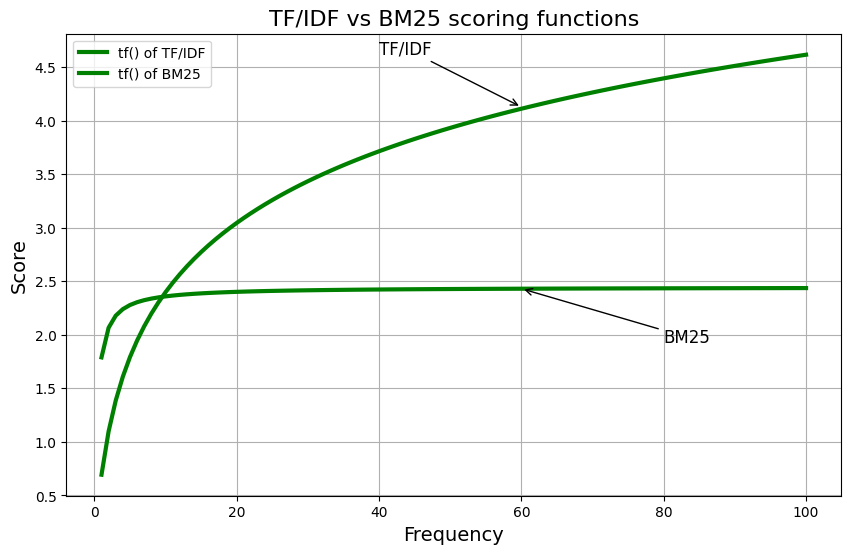

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generate term frequencies
frequencies = np.arange(1, 101)

# Calculate TF-IDF scores (using log(1 + frequency))
tfidf_scores = np.log(1 + frequencies)

# Calculate BM25 scores
k1 = 1.5  # typically between 1.2 and 2.0
b = 0.75  # typically between 0.5 and 0.75
avg_dl = 50  # average document length

# BM25 formula
bm25_scores = ((k1 + 1) * frequencies) / (k1 * (1 - b + b * frequencies / avg_dl) + frequencies)

# Plot the scores
plt.figure(figsize=(10, 6))
plt.plot(frequencies, tfidf_scores, label='tf() of TF/IDF', color='green', linewidth=3)
plt.plot(frequencies, bm25_scores, label='tf() of BM25', color='green', linewidth=3)


plt.annotate('TF/IDF', xy=(60, tfidf_scores[60]), xytext=(40, tfidf_scores[60] + 0.5),
             arrowprops=dict(arrowstyle="->", color='black'), fontsize=12, color='black')
plt.annotate('BM25', xy=(60, bm25_scores[60]), xytext=(80, bm25_scores[60] - 0.5),
             arrowprops=dict(arrowstyle="->", color='black'), fontsize=12, color='black')

plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.title('TF/IDF vs BM25 scoring functions', fontsize=16)

plt.grid(True)

plt.legend()
plt.savefig('tfidf_bm25.jpg', format='jpeg')
plt.show()


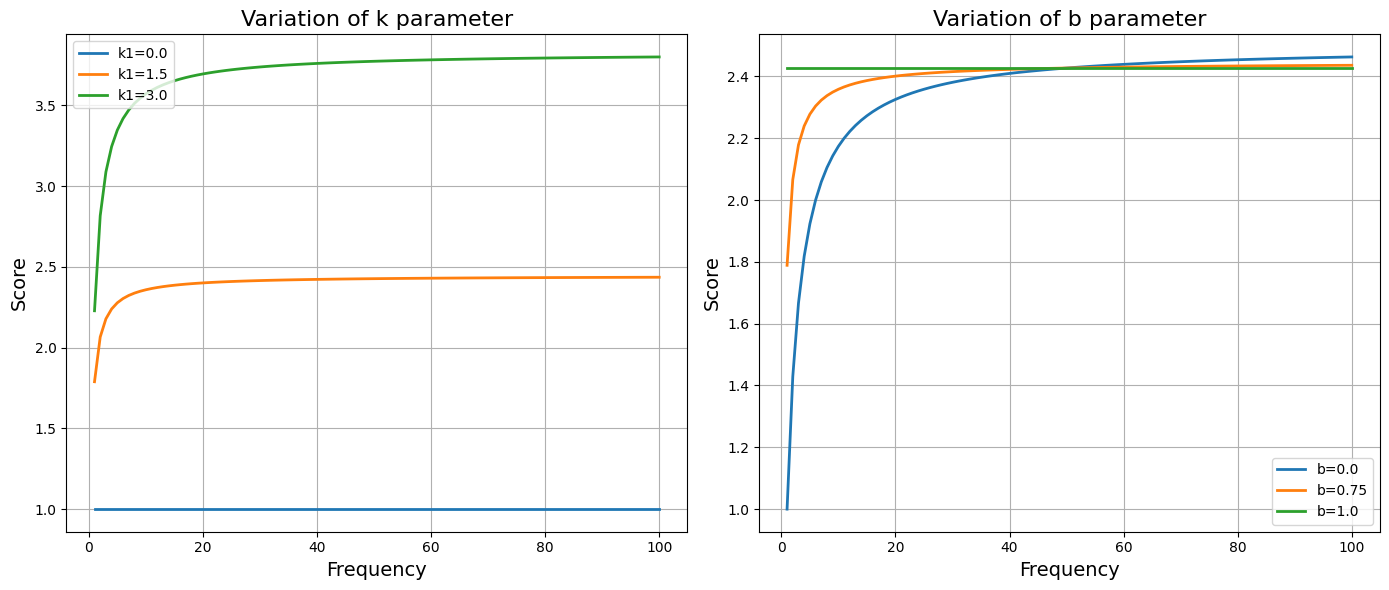

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Generate term frequencies
frequencies = np.arange(1, 101)

# Define the average document length
avg_dl = 50 

# Different values for k and b parameters
k_values = [0., 1.5, 3.0]
b_values = [0., 0.75, 1.0]


fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Variation of k parameter
for k1 in k_values:
    bm25_scores = ((k1 + 1) * frequencies) / (k1 * (1 - 0.75 + 0.75 * frequencies / avg_dl) + frequencies)
    axs[0].plot(frequencies, bm25_scores, label=f'k1={k1}', linewidth=2)

axs[0].set_title('Variation of k parameter', fontsize=16)
axs[0].set_xlabel('Frequency', fontsize=14)
axs[0].set_ylabel('Score', fontsize=14)
axs[0].legend()
axs[0].grid(True)

# Variation of b parameter
for b in b_values:
    bm25_scores = ((1.5 + 1) * frequencies) / (1.5 * (1 - b + b * frequencies / avg_dl) + frequencies)
    axs[1].plot(frequencies, bm25_scores, label=f'b={b}', linewidth=2)

axs[1].set_title('Variation of b parameter', fontsize=16)
axs[1].set_xlabel('Frequency', fontsize=14)
axs[1].set_ylabel('Score', fontsize=14)
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.savefig('b_and_k_values.jpg', format='jpeg')
plt.show()


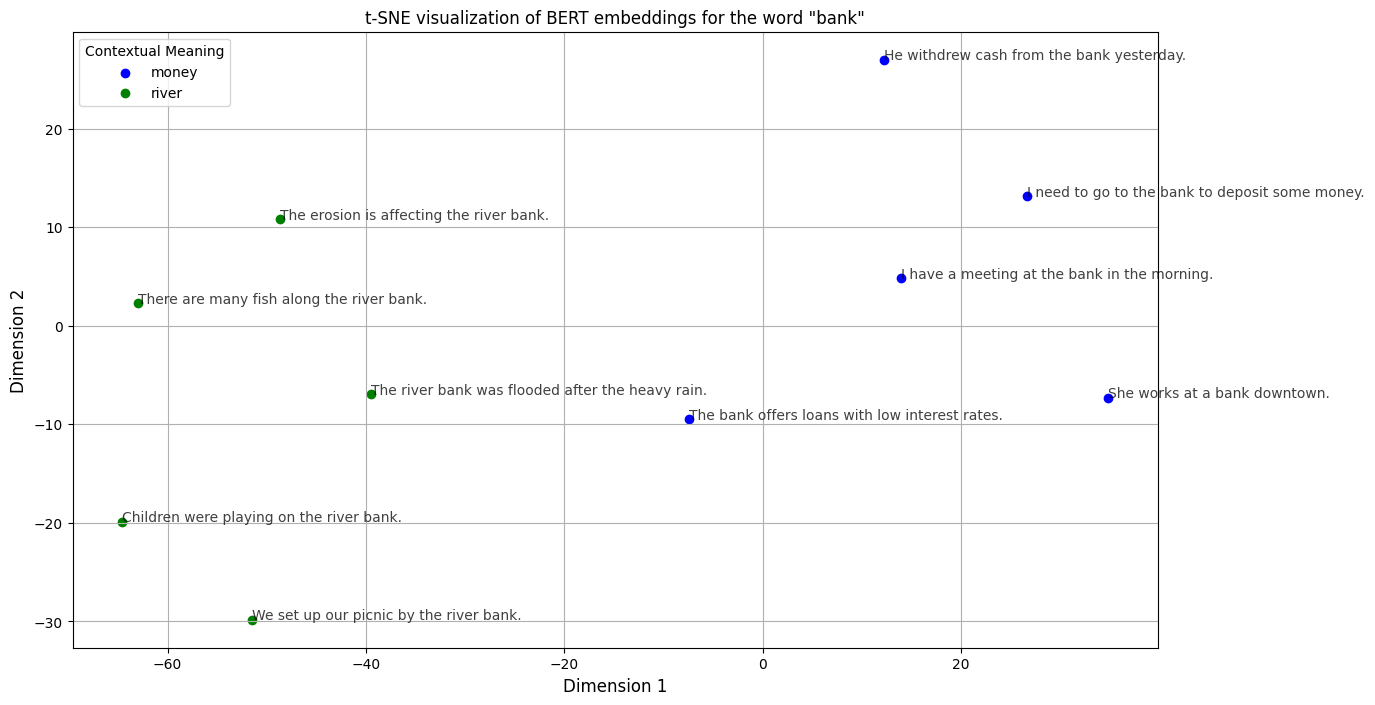

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from transformers import BertModel, BertTokenizer
import torch
import numpy as np

# List of sentences with the word "bank" having different meanings
sentences = [
    "I need to go to the bank to deposit some money.",
    "The river bank was flooded after the heavy rain.",
    "She works at a bank downtown.",
    "We set up our picnic by the river bank.",
    "He withdrew cash from the bank yesterday.",
    "There are many fish along the river bank.",
    "The bank offers loans with low interest rates.",
    "Children were playing on the river bank.",
    "I have a meeting at the bank in the morning.",
    "The erosion is affecting the river bank."
]

# Labels indicating the meaning of "bank" in each sentence
labels = ['money', 'river', 'money', 'river', 'money', 'river', 'money', 'river', 'money', 'river']


# Function to get embeddings for the word "bank" in each sentence
def get_word_embedding(text, word, model, tokenizer):
    inputs = tokenizer(text, return_tensors='pt')
    tokenized_text = tokenizer.tokenize(text)
    word_idx = tokenized_text.index(word)
    with torch.no_grad():
        outputs = model(**inputs)
    word_embedding = outputs.last_hidden_state[0, word_idx, :].numpy()
    return word_embedding

# Load BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

# Get embeddings for the word "bank" in all sentences
embeddings = np.array([get_word_embedding(sentence, "bank", model, tokenizer) for sentence in sentences])

# Use t-SNE to reduce dimensionality to 2D
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
embeddings_2d = tsne.fit_transform(embeddings)

plt.figure(figsize=(14, 8))
colors = {'money': 'blue', 'river': 'green'}
for i, label in enumerate(labels ):
    plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1], color=colors[label], label=label if (labels + ['money', 'river']).index(label) == i else "")
    plt.annotate(sentences[i], (embeddings_2d[i, 0], embeddings_2d[i, 1]), fontsize=10, alpha=0.75)

plt.title('t-SNE visualization of BERT embeddings for the word "bank"')
plt.xlabel('Dimension 1', fontsize=12)
plt.ylabel('Dimension 2', fontsize=12)
plt.legend(title="Contextual Meaning", loc= 'upper left')
plt.grid(True)
plt.savefig('bank polysemi.jpg', format='jpeg')
plt.show()


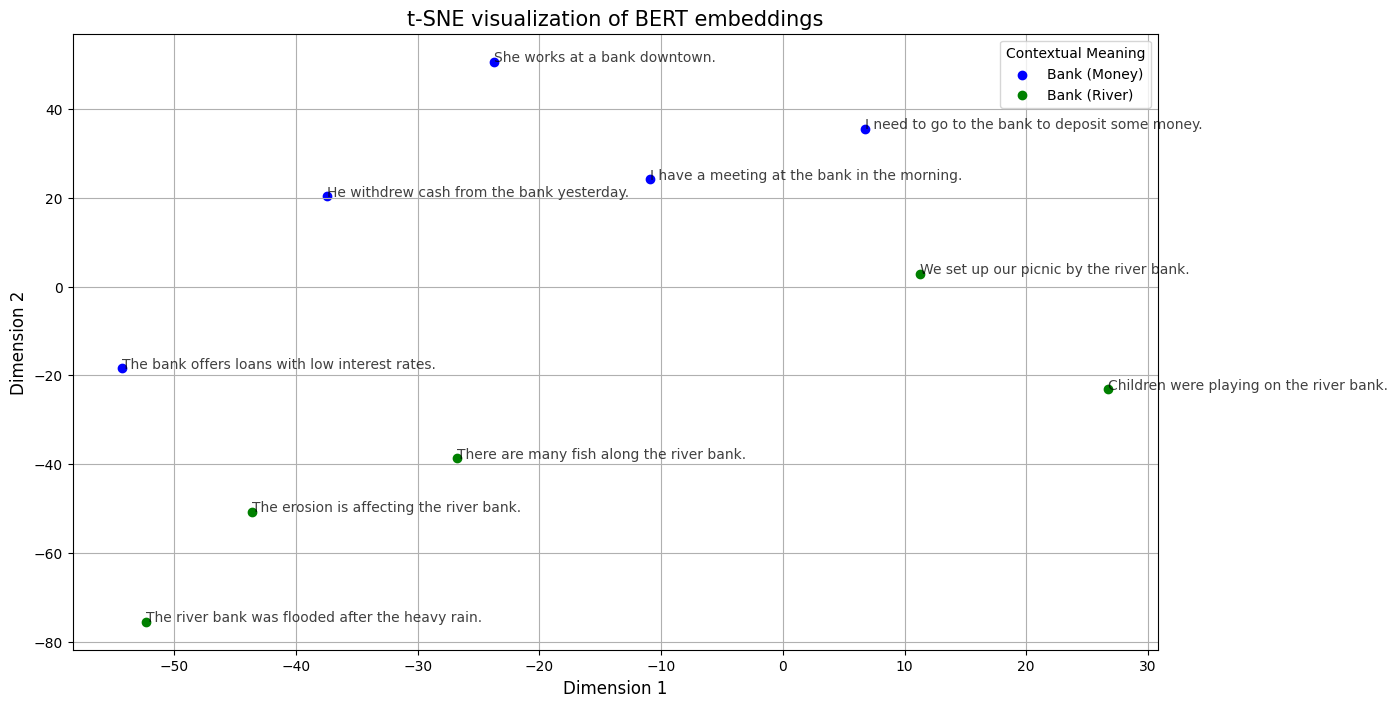

In [1]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from transformers import BertModel, BertTokenizer
import torch
import numpy as np

# List of sentences with the word "bank" having different meanings
sentences = [
    "I need to go to the bank to deposit some money.",
    "The river bank was flooded after the heavy rain.",
    "She works at a bank downtown.",
    "We set up our picnic by the river bank.",
    "He withdrew cash from the bank yesterday.",
    "There are many fish along the river bank.",
    "The bank offers loans with low interest rates.",
    "Children were playing on the river bank.",
    "I have a meeting at the bank in the morning.",
    "The erosion is affecting the river bank."
]

# Labels indicating the meaning of "bank" in each sentence
labels = ['money', 'river', 'money', 'river', 'money', 'river', 'money', 'river', 'money', 'river']

# Function to get CLS embeddings
def get_cls_embedding(text, model, tokenizer):
    inputs = tokenizer(text, return_tensors='pt')
    with torch.no_grad():
        outputs = model(**inputs)
    cls_embedding = outputs.last_hidden_state[:, 0, :].squeeze().numpy()
    return cls_embedding

# Load BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

# Get embeddings for all sentences
embeddings = np.array([get_cls_embedding(sentence, model, tokenizer) for sentence in sentences])

# Use t-SNE to reduce dimensionality to 2D
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
embeddings_2d = tsne.fit_transform(embeddings)


plt.figure(figsize=(14, 8))
colors = {'money': 'blue', 'river': 'green'}
label_to_scatter = {'money': 'Bank (Money)', 'river': 'Bank (River)'}
for i, label in enumerate(labels):
    plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1], color=colors[label], label=label_to_scatter[label] if i == labels.index(label) else "")
    plt.annotate(sentences[i], (embeddings_2d[i, 0], embeddings_2d[i, 1]), fontsize=10, alpha=0.75)

plt.title('t-SNE visualization of BERT embeddings', fontsize=15)
plt.xlabel('Dimension 1', fontsize=12)
plt.ylabel('Dimension 2', fontsize=12)
plt.legend(title="Contextual Meaning")
plt.grid(True)
plt.show()


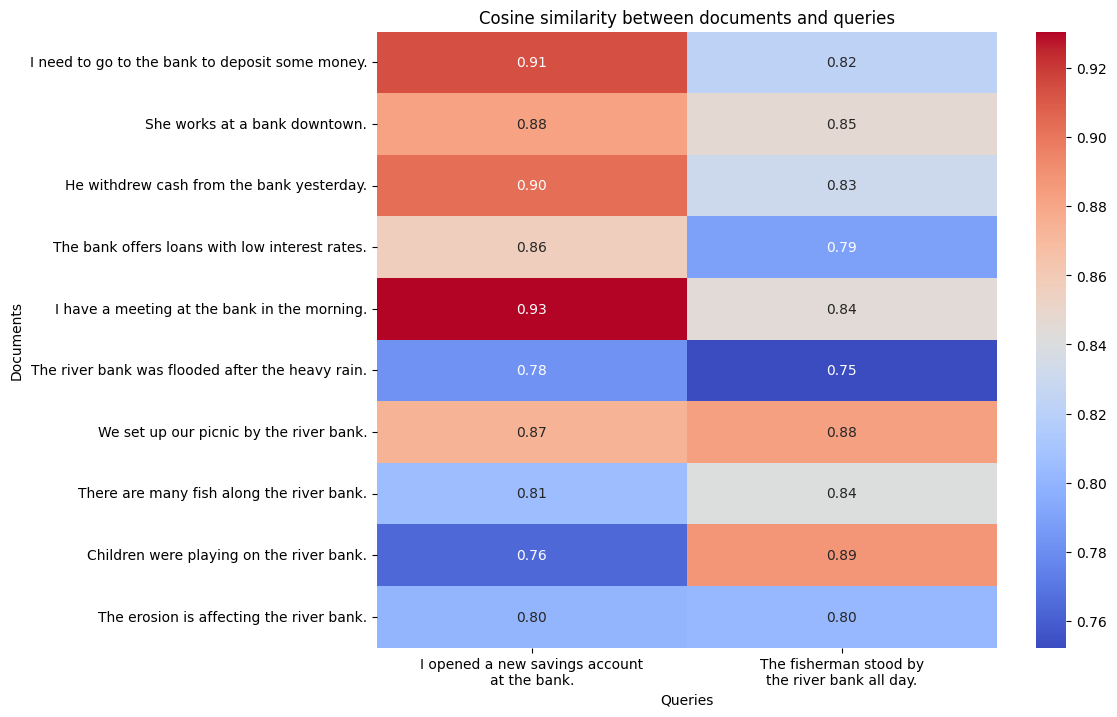

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from transformers import BertModel, BertTokenizer
import torch
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# List of sentences with the word "bank" having different meanings
sentences = [
    "I need to go to the bank to deposit some money.",
    "The river bank was flooded after the heavy rain.",
    "She works at a bank downtown.",
    "We set up our picnic by the river bank.",
    "He withdrew cash from the bank yesterday.",
    "There are many fish along the river bank.",
    "The bank offers loans with low interest rates.",
    "Children were playing on the river bank.",
    "I have a meeting at the bank in the morning.",
    "The erosion is affecting the river bank."
]

# Labels indicating the meaning of "bank" in each sentence
labels = ['money', 'river', 'money', 'river', 'money', 'river', 'money', 'river', 'money', 'river']


queries = [
    "I opened a new savings account at the bank.",  # money
    "The fisherman stood by the river bank all day."  # river
]

# Function to get CLS embeddings
def get_cls_embedding(text, model, tokenizer):
    inputs = tokenizer(text, return_tensors='pt')
    with torch.no_grad():
        outputs = model(**inputs)
    cls_embedding = outputs.last_hidden_state[:, 0, :].squeeze().numpy()
    return cls_embedding

# Load BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

# Get embeddings for all sentences
embeddings = np.array([get_cls_embedding(sentence, model, tokenizer) for sentence in sentences])
new_embeddings = np.array([get_cls_embedding(sentence, model, tokenizer) for sentence in queries])

# Calculate cosine similarities
similarities = cosine_similarity(embeddings, new_embeddings)

# Reorder sentences and similarities based on labels
sorted_indices = sorted(range(len(labels)), key=lambda i: labels[i])
sorted_sentences = [sentences[i] for i in sorted_indices]
sorted_similarities = similarities[sorted_indices, :]

queries = [
    "I opened a new savings account\nat the bank.",  # money
    "The fisherman stood by\nthe river bank all day."  # river
]
plt.figure(figsize=(10, 8))
sns.heatmap(sorted_similarities, annot=True, xticklabels=queries, 
            yticklabels=sorted_sentences, cmap='coolwarm', fmt='.2f')
plt.title('Cosine similarity between documents and queries')
plt.xlabel('Queries')
plt.ylabel('Documents')
plt.savefig('bi-encoder.jpg', format='jpeg', bbox_inches='tight')
plt.show()


# Tokenization

## simple splitting no overlap

In [2]:
from transformers import BertTokenizer
from IPython.display import HTML
from langchain.text_splitter import TokenTextSplitter

# Initialize the tokenizer and text splitter
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
text_splitter = TokenTextSplitter(
    chunk_size = 80,
    chunk_overlap = 0
)

# Function to color and display text chunks
def color_text_chunks(text, text_splitter):
    docs = text_splitter.create_documents([text])
    chunks = [doc.page_content for doc in docs]  # Access the text attribute

    colored_text = ""
    colors = ['#ff9999', '#99ff99', '#9999ff', '#ffff99', '#99ffff', '#ff99ff', '#cccccc',
              '#ff6666', '#66ff66', '#6666ff', '#ffff66', '#66ffff', '#ff66ff', '#ccccff',
              '#996699', '#669999', '#999966', '#669966', '#966696', '#696669']

    for i, chunk in enumerate(chunks):
        color = colors[i % len(colors)]
        chunk_html = f'<span style="background-color:{color}">{chunk}</span>'
        colored_text += chunk_html + '<br><br>'

    return HTML(colored_text)


text = '''To be or not to be, that is the question.
Whether tis nobler in the mind to suffer
The slings and arrows of outrageous fortune
Or to take arms against a sea of troubles,
And by opposing, end them. To die, to sleep
No more, and by a sleep to say we end,
The heartache and the thousand natural shocks
That flesh is heir to, tis a consummation
Devoutly to be wished.'''

color_text_chunks(text, text_splitter)


## simple splitting with overlap

In [4]:
from transformers import BertTokenizer
from IPython.display import HTML
from langchain.text_splitter import TokenTextSplitter
from collections import defaultdict

# Initialize the tokenizer and text splitter
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Function to color and display text chunks
def color_text_chunks(text, chunk_size, overlap):
    text_splitter = TokenTextSplitter(
        chunk_size=chunk_size,
        chunk_overlap=overlap
    )
    docs = text_splitter.create_documents([text])
    chunks = [doc.page_content for doc in docs]  # Access the text attribute

    # Define colors
    colors = ['#ff9999', '#99ff99', '#9999ff', '#ffff99', '#99ffff', '#ff99ff', '#cccccc',
              '#ff6666', '#66ff66', '#6666ff', '#ffff66', '#66ffff', '#ff66ff', '#ccccff',
              '#996699', '#669999', '#999966', '#669966', '#966696', '#696669']

    # Define color positions for each chunk
    color_positions = []
    for i in range(len(chunks)):
        chunk_tokens = tokenizer.tokenize(chunks[i])
        chunk_length = len(chunk_tokens)
        if chunk_length > overlap:
            unique_length = chunk_length - overlap
            chunk_colors = [colors[i % len(colors)]] * unique_length + \
                           [blend_colors([colors[i % len(colors)], colors[(i+1) % len(colors)]])] * overlap
        else:
            chunk_colors = [blend_colors([colors[i % len(colors)], colors[(i+1) % len(colors)]])] * chunk_length
        color_positions.append(chunk_colors)

    # Adjust colors for overlapping tokens in the next chunk
    for i in range(1, len(color_positions)):
        overlap_color = blend_colors([colors[(i-1) % len(colors)], colors[i % len(colors)]])
        color_positions[i] = [overlap_color] * overlap + color_positions[i][overlap:]

    # Generate colored HTML
    colored_text = ""
    for i, chunk in enumerate(chunks):
        tokens = tokenizer.tokenize(chunk)
        for j, token in enumerate(tokens):
            color = color_positions[i][j]
            token_html = f'<span style="background-color:{color}">{token}</span>'
            colored_text += token_html + ' '
        colored_text += '<br><br>'

    return HTML(colored_text)

def blend_colors(color_list):
    # Simple function to blend multiple colors
    r, g, b = 0, 0, 0
    for color in color_list:
        c = int(color[1:], 16)
        r += c >> 16
        g += (c >> 8) & 0xff
        b += c & 0xff
    n = len(color_list)
    r = min(r // n, 255)
    g = min(g // n, 255)
    b = min(b // n, 255)
    return f'#{r:02x}{g:02x}{b:02x}'

text = '''To be or not to be, that is the question.
Whether tis nobler in the mind to suffer
The slings and arrows of outrageous fortune
Or to take arms against a sea of troubles,
And by opposing, end them. To die, to sleep
No more, and by a sleep to say we end,
The heartache and the thousand natural shocks
That flesh is heir to, tis a consummation
Devoutly to be wished.'''

chunk_size = 80
overlap = 20

color_text_chunks(text, chunk_size, overlap)


## Character splitting on the new line

In [7]:
from transformers import BertTokenizer
from IPython.display import HTML
from langchain.text_splitter import CharacterTextSplitter
# Initialize the tokenizer and text splitter
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
text_splitter = CharacterTextSplitter(
    separator = "\n",
    chunk_size = 256,
    chunk_overlap = 0
)

# Function to color and display text chunks
def color_text_chunks(text, text_splitter):
    docs = text_splitter.create_documents([text])
    chunks = [doc.page_content for doc in docs]  # Access the text attribute

    colored_text = ""
    colors = ['#ff9999', '#99ff99', '#9999ff', '#ffff99', '#99ffff', '#ff99ff', '#cccccc',
              '#ff6666', '#66ff66', '#6666ff', '#ffff66', '#66ffff', '#ff66ff', '#ccccff',
              '#996699', '#669999', '#999966', '#669966', '#966696', '#696669']

    for i, chunk in enumerate(chunks):
        color = colors[i % len(colors)]
        chunk_html = f'<span style="background-color:{color}">{chunk}</span>'
        colored_text += chunk_html + '<br><br>'

    return HTML(colored_text)

# Example usage
text = '''To be or not to be, that is the question.
Whether tis nobler in the mind to suffer
The slings and arrows of outrageous fortune
Or to take arms against a sea of troubles,
And by opposing, end them. To die, to sleep
No more, and by a sleep to say we end,
The heartache and the thousand natural shocks
That flesh is heir to, tis a consummation
Devoutly to be wished.'''

color_text_chunks(text, text_splitter)


## Recursive character splitting

In [8]:
from transformers import BertTokenizer
from IPython.display import HTML
from langchain.text_splitter import TokenTextSplitter, RecursiveCharacterTextSplitter
from collections import defaultdict

# Initialize the tokenizer and text splitter
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Function to color and display text chunks
def color_text_chunks(text, chunk_size, overlap):
    text_splitter = RecursiveCharacterTextSplitter(
        separators = ["\n\n", "\n", " ", ""],
        chunk_size=chunk_size,
        chunk_overlap=overlap
    )
    docs = text_splitter.create_documents([text])
    chunks = [doc.page_content for doc in docs]  # Access the text attribute

    # Define colors
    colors = ['#ff9999', '#99ff99', '#9999ff', '#ffff99', '#99ffff', '#ff99ff', '#cccccc',
              '#ff6666', '#66ff66', '#6666ff', '#ffff66', '#66ffff', '#ff66ff', '#ccccff',
              '#996699', '#669999', '#999966', '#669966', '#966696', '#696669']

    # Define color positions for each chunk
    color_positions = []
    for i in range(len(chunks)):
        chunk_tokens = tokenizer.tokenize(chunks[i])
        chunk_length = len(chunk_tokens)
        if chunk_length > overlap:
            unique_length = chunk_length - overlap
            chunk_colors = [colors[i % len(colors)]] * unique_length + \
                           [blend_colors([colors[i % len(colors)], colors[(i+1) % len(colors)]])] * overlap
        else:
            chunk_colors = [blend_colors([colors[i % len(colors)], colors[(i+1) % len(colors)]])] * chunk_length
        color_positions.append(chunk_colors)

    # Adjust colors for overlapping tokens in the next chunk
    for i in range(1, len(color_positions)):
        overlap_color = blend_colors([colors[(i-1) % len(colors)], colors[i % len(colors)]])
        color_positions[i] = [overlap_color] * overlap + color_positions[i][overlap:]

    # Generate colored HTML
    colored_text = ""
    for i, chunk in enumerate(chunks):
        tokens = tokenizer.tokenize(chunk)
        for j, token in enumerate(tokens):
            color = color_positions[i][j]
            token_html = f'<span style="background-color:{color}">{token}</span>'
            colored_text += token_html + ' '
        colored_text += '<br><br>'

    return HTML(colored_text)

def blend_colors(color_list):
    # Simple function to blend multiple colors
    r, g, b = 0, 0, 0
    for color in color_list:
        c = int(color[1:], 16)
        r += c >> 16
        g += (c >> 8) & 0xff
        b += c & 0xff
    n = len(color_list)
    r = min(r // n, 255)
    g = min(g // n, 255)
    b = min(b // n, 255)
    return f'#{r:02x}{g:02x}{b:02x}'

text = '''To be or not to be, that is the question.
Whether tis nobler in the mind to suffer
The slings and arrows of outrageous fortune
Or to take arms against a sea of troubles,
And by opposing, end them. To die, to sleep
No more, and by a sleep to say we end,
The heartache and the thousand natural shocks
That flesh is heir to, tis a consummation
Devoutly to be wished.'''

chunk_size = 256
overlap = 20

color_text_chunks(text, chunk_size, overlap)


In [9]:
## Markdown chunking

In [14]:
from langchain.text_splitter import MarkdownTextSplitter
from transformers import BertTokenizer
from IPython.display import HTML
from langchain.text_splitter import TokenTextSplitter, RecursiveCharacterTextSplitter
from collections import defaultdict

# Initialize the tokenizer and text splitter
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Function to color and display text chunks
def color_text_chunks(text, chunk_size, overlap, text_splitter):

    docs = text_splitter.create_documents([text])
    chunks = [doc.page_content for doc in docs]  # Access the text attribute

    # Define colors
    colors = ['#ff9999', '#99ff99', '#9999ff', '#ffff99', '#99ffff', '#ff99ff', '#cccccc',
              '#ff6666', '#66ff66', '#6666ff', '#ffff66', '#66ffff', '#ff66ff', '#ccccff',
              '#996699', '#669999', '#999966', '#669966', '#966696', '#696669']

    # Define color positions for each chunk
    color_positions = []
    for i in range(len(chunks)):
        chunk_tokens = tokenizer.tokenize(chunks[i])
        chunk_length = len(chunk_tokens)
        if chunk_length > overlap:
            unique_length = chunk_length - overlap
            chunk_colors = [colors[i % len(colors)]] * unique_length + \
                           [blend_colors([colors[i % len(colors)], colors[(i+1) % len(colors)]])] * overlap
        else:
            chunk_colors = [blend_colors([colors[i % len(colors)], colors[(i+1) % len(colors)]])] * chunk_length
        color_positions.append(chunk_colors)

    # Adjust colors for overlapping tokens in the next chunk
    for i in range(1, len(color_positions)):
        overlap_color = blend_colors([colors[(i-1) % len(colors)], colors[i % len(colors)]])
        color_positions[i] = [overlap_color] * overlap + color_positions[i][overlap:]

    # Generate colored HTML
    colored_text = ""
    for i, chunk in enumerate(chunks):
        tokens = tokenizer.tokenize(chunk)
        for j, token in enumerate(tokens):
            color = color_positions[i][j]
            token_html = f'<span style="background-color:{color}">{token}</span>'
            colored_text += token_html + ' '
        colored_text += '<br><br>'

    return HTML(colored_text)

def blend_colors(color_list):
    # Simple function to blend multiple colors
    r, g, b = 0, 0, 0
    for color in color_list:
        c = int(color[1:], 16)
        r += c >> 16
        g += (c >> 8) & 0xff
        b += c & 0xff
    n = len(color_list)
    r = min(r // n, 255)
    g = min(g // n, 255)
    b = min(b // n, 255)
    return f'#{r:02x}{g:02x}{b:02x}'


text = '''
# Retrieval-Augmented Generation (RAG)

## Introduction

Retrieval-Augmented Generation (RAG) is a technique in natural language processing (NLP) that combines the strengths of retrieval-based methods and generation-based methods. It is designed to enhance the quality and accuracy of generated text by leveraging a large corpus of documents during the text generation process.

## How RAG Works

### Retrieval Component

The retrieval component is responsible for searching a large dataset or knowledge base to find relevant documents or passages that are related to the input query. This component typically uses advanced search algorithms and embeddings to identify the most pertinent information.

### Generation Component

The generation component takes the retrieved documents as additional context and generates a coherent and contextually accurate response. This is usually achieved using transformer-based models like BERT or GPT, which can process the input query along with the retrieved information to produce high-quality text.

## Advantages of RAG

1. **Enhanced Accuracy**: By using relevant external documents, RAG can generate more accurate and informed responses.
2. **Contextual Relevance**: The retrieval component ensures that the generated text is contextually relevant to the query.
3. **Scalability**: RAG can be scaled to work with vast datasets, making it suitable for applications requiring extensive knowledge bases.

## Applications of RAG

1. **Question Answering Systems**: RAG can be used to improve the performance of question answering systems by providing precise and detailed answers.
2. **Customer Support**: In customer support, RAG can assist in generating accurate responses to customer queries by referencing a large database of knowledge.
3. **Content Creation**: RAG can aid content creators by providing relevant information and generating high-quality content based on the retrieved data.

## Conclusion

Retrieval-Augmented Generation (RAG) represents a significant advancement in NLP by combining the best aspects of retrieval and generation methods. Its ability to utilize vast datasets for generating contextually accurate and high-quality text makes it a powerful tool for various applications.
'''

chunk_size = 200
overlap = 0

text_splitter = MarkdownTextSplitter(
    chunk_size=chunk_size,  
    chunk_overlap=overlap  
)

color_text_chunks(text, chunk_size, overlap, text_splitter)


## LaTex Chunker

In [15]:
from langchain.text_splitter import LatexTextSplitter
text = '''
\\section{Retrieval-Augmented Generation (RAG)}

\\subsection{Introduction}

Retrieval-Augmented Generation (RAG) is a technique in natural language processing (NLP) that combines the strengths of retrieval-based methods and generation-based methods. It is designed to enhance the quality and accuracy of generated text by leveraging a large corpus of documents during the text generation process.

\\subsection{How RAG Works}

\\subsubsection{Retrieval Component}

The retrieval component is responsible for searching a large dataset or knowledge base to find relevant documents or passages that are related to the input query. This component typically uses advanced search algorithms and embeddings to identify the most pertinent information.

\\subsubsection{Generation Component}

The generation component takes the retrieved documents as additional context and generates a coherent and contextually accurate response. This is usually achieved using transformer-based models like BERT or GPT, which can process the input query along with the retrieved information to produce high-quality text.

\\subsection{Advantages of RAG}

\\begin{itemize}
    \\item \\textbf{Enhanced Accuracy}: By using relevant external documents, RAG can generate more accurate and informed responses.
    \\item \\textbf{Contextual Relevance}: The retrieval component ensures that the generated text is contextually relevant to the query.
    \\item \\textbf{Scalability}: RAG can be scaled to work with vast datasets, making it suitable for applications requiring extensive knowledge bases.
\\end{itemize}

\\subsection{Applications of RAG}

\\begin{itemize}
    \\item \\textbf{Question Answering Systems}: RAG can be used to improve the performance of question answering systems by providing precise and detailed answers.
    \\item \\textbf{Customer Support}: In customer support, RAG can assist in generating accurate responses to customer queries by referencing a large database of knowledge.
    \\item \\textbf{Content Creation}: RAG can aid content creators by providing relevant information and generating high-quality content based on the retrieved data.
\\end{itemize}

\\subsection{Conclusion}

Retrieval-Augmented Generation (RAG) represents a significant advancement in NLP by combining the best aspects of retrieval and generation methods. Its ability to utilize vast datasets for generating contextually accurate and high-quality text makes it a powerful tool for various applications.
'''

chunk_size = 200
overlap = 0

text_splitter = LatexTextSplitter(
    chunk_size=chunk_size,  
    chunk_overlap=overlap  
)

color_text_chunks(text, chunk_size, overlap, text_splitter)

## HTML splitter

In [16]:
from langchain_text_splitters import HTMLHeaderTextSplitter

def color_text_chunks(text, chunk_size, overlap, text_splitter):
    # modified for HTMLHeaderTextSplitter
    docs = text_splitter.split_text(text)
    chunks = [doc.page_content for doc in docs]  # Access the text attribute

    # Define colors
    colors = ['#ff9999', '#99ff99', '#9999ff', '#ffff99', '#99ffff', '#ff99ff', '#cccccc',
              '#ff6666', '#66ff66', '#6666ff', '#ffff66', '#66ffff', '#ff66ff', '#ccccff',
              '#996699', '#669999', '#999966', '#669966', '#966696', '#696669']

    # Define color positions for each chunk
    color_positions = []
    for i in range(len(chunks)):
        chunk_tokens = tokenizer.tokenize(chunks[i])
        chunk_length = len(chunk_tokens)
        if chunk_length > overlap:
            unique_length = chunk_length - overlap
            chunk_colors = [colors[i % len(colors)]] * unique_length + \
                           [blend_colors([colors[i % len(colors)], colors[(i+1) % len(colors)]])] * overlap
        else:
            chunk_colors = [blend_colors([colors[i % len(colors)], colors[(i+1) % len(colors)]])] * chunk_length
        color_positions.append(chunk_colors)

    # Adjust colors for overlapping tokens in the next chunk
    for i in range(1, len(color_positions)):
        overlap_color = blend_colors([colors[(i-1) % len(colors)], colors[i % len(colors)]])
        color_positions[i] = [overlap_color] * overlap + color_positions[i][overlap:]

    # Generate colored HTML
    colored_text = ""
    for i, chunk in enumerate(chunks):
        tokens = tokenizer.tokenize(chunk)
        for j, token in enumerate(tokens):
            color = color_positions[i][j]
            token_html = f'<span style="background-color:{color}">{token}</span>'
            colored_text += token_html + ' '
        colored_text += '<br><br>'

    return HTML(colored_text)


text = '''
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Retrieval-Augmented Generation (RAG)</title>
</head>
<body>
    <h1>Retrieval-Augmented Generation (RAG)</h1>

    <h2>Introduction</h2>
    <p>Retrieval-Augmented Generation (RAG) is a technique in natural language processing (NLP) that combines the strengths of retrieval-based methods and generation-based methods. It is designed to enhance the quality and accuracy of generated text by leveraging a large corpus of documents during the text generation process.</p>

    <h2>How RAG Works</h2>

    <h3>Retrieval Component</h3>
    <p>The retrieval component is responsible for searching a large dataset or knowledge base to find relevant documents or passages that are related to the input query. This component typically uses advanced search algorithms and embeddings to identify the most pertinent information.</p>

    <h3>Generation Component</h3>
    <p>The generation component takes the retrieved documents as additional context and generates a coherent and contextually accurate response. This is usually achieved using transformer-based models like BERT or GPT, which can process the input query along with the retrieved information to produce high-quality text.</p>

    <h2>Advantages of RAG</h2>
    <ul>
        <li><strong>Enhanced Accuracy</strong>: By using relevant external documents, RAG can generate more accurate and informed responses.</li>
        <li><strong>Contextual Relevance</strong>: The retrieval component ensures that the generated text is contextually relevant to the query.</li>
        <li><strong>Scalability</strong>: RAG can be scaled to work with vast datasets, making it suitable for applications requiring extensive knowledge bases.</li>
    </ul>

    <h2>Applications of RAG</h2>
    <ul>
        <li><strong>Question Answering Systems</strong>: RAG can be used to improve the performance of question answering systems by providing precise and detailed answers.</li>
        <li><strong>Customer Support</strong>: In customer support, RAG can assist in generating accurate responses to customer queries by referencing a large database of knowledge.</li>
        <li><strong>Content Creation</strong>: RAG can aid content creators by providing relevant information and generating high-quality content based on the retrieved data.</li>
    </ul>

    <h2>Conclusion</h2>
    <p>Retrieval-Augmented Generation (RAG) represents a significant advancement in NLP by combining the best aspects of retrieval and generation methods. Its ability to utilize vast datasets for generating contextually accurate and high-quality text makes it a powerful tool for various applications.</p>
</body>
</html>
'''


headers_to_split_on = [
    ("h1", "Header 1"),
    ("h2", "Header 2"),
    ("h3", "Header 3"),
]

text_splitter = HTMLHeaderTextSplitter(headers_to_split_on)

color_text_chunks(text, chunk_size, overlap, text_splitter)

## Proposition chunking

In [1]:
# from the original article: https://github.com/chentong0/factoid-wiki
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import torch
import json

model_name = "chentong00/propositionizer-wiki-flan-t5-large"
device = "cuda" if torch.cuda.is_available() else "cpu"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name).to(device)

title = "Leaning Tower of Pisa"
section = ""
content = "Prior to restoration work performed between 1990 and 2001, Leaning Tower of Pisa leaned at an angle of 5.5 degrees, but the tower now leans at about 3.99 degrees. This means the top of the tower is displaced horizontally 3.9 meters (12 ft 10 in) from the center."

input_text = f"Title: {title}. Section: {section}. Content: {content}"

input_ids = tokenizer(input_text, return_tensors="pt").input_ids
outputs = model.generate(input_ids.to(device), max_new_tokens=512).cpu()

output_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
try:
    prop_list = json.loads(output_text)
except:
    prop_list = []
    print("[ERROR] Failed to parse output text as JSON.")
print(json.dumps(prop_list, indent=2))

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


[
  "Prior to restoration work performed between 1990 and 2001, Leaning Tower of Pisa leaned at an angle of 5.5 degrees.",
  "Leaning Tower of Pisa now leans at about 3.99 degrees.",
  "The top of Leaning Tower of Pisa is displaced horizontally 3.9 meters (12 ft 10 in) from the center."
]


# Quantization

/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


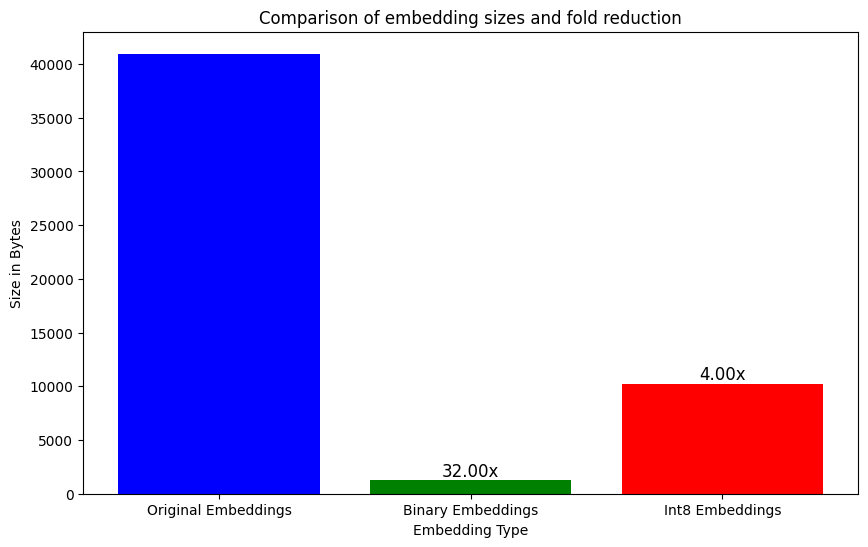

In [2]:
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
from sentence_transformers.quantization import quantize_embeddings
from datasets import load_dataset


sentences = [
    "I need to go to the bank to deposit some money.",
    "The river bank was flooded after the heavy rain.",
    "She works at a bank downtown.",
    "We set up our picnic by the river bank.",
    "He withdrew cash from the bank yesterday.",
    "There are many fish along the river bank.",
    "The bank offers loans with low interest rates.",
    "Children were playing on the river bank.",
    "I have a meeting at the bank in the morning.",
    "The erosion is affecting the river bank."
]

# Load an embedding model
model = SentenceTransformer("mixedbread-ai/mxbai-embed-large-v1")

# Encode the sentences without quantization
embeddings = model.encode(sentences)

# Apply binary quantization
binary_embeddings = quantize_embeddings(embeddings, precision="binary")

# Prepare an example calibration dataset
corpus = load_dataset("nq_open", split="train[:1000]")["question"]
calibration_embeddings = model.encode(corpus)

# Apply int8 quantization
int8_embeddings = quantize_embeddings(
    embeddings,
    precision="int8",
    calibration_embeddings=calibration_embeddings,
)

# Collect nbytes information and fold reduction
embeddings_nbytes = embeddings.nbytes
binary_embeddings_nbytes = binary_embeddings.nbytes
int8_embeddings_nbytes = int8_embeddings.nbytes


binary_fold_reduction = embeddings_nbytes / binary_embeddings_nbytes
int8_fold_reduction = embeddings_nbytes / int8_embeddings_nbytes

# Plot the nbytes and fold reduction
labels = ['Original Embeddings', 'Binary Embeddings', 'Int8 Embeddings']
nbytes_values = [embeddings_nbytes, binary_embeddings_nbytes, int8_embeddings_nbytes]

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, nbytes_values, color=['blue', 'green', 'red'])

plt.text(1, binary_embeddings_nbytes, f'{binary_fold_reduction:.2f}x', ha='center', va='bottom', fontsize=12)
plt.text(2, int8_embeddings_nbytes, f'{int8_fold_reduction:.2f}x', ha='center', va='bottom', fontsize=12)

plt.xlabel('Embedding Type')
plt.ylabel('Size in Bytes')
plt.title('Comparison of embedding sizes and fold reduction')
plt.savefig('vector quantization.jpg', format='jpeg', bbox_inches='tight')
plt.show()


/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in

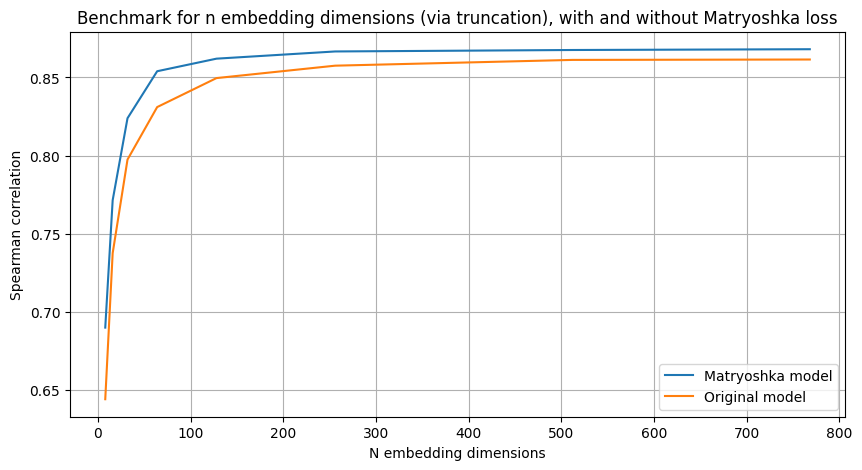

In [1]:
from transformers import AutoTokenizer, AutoModel
from datasets import load_dataset
import numpy as np
from sentence_transformers import util, SentenceTransformer, evaluation
import matplotlib.pyplot as plt
from sentence_transformers.evaluation import (
    EmbeddingSimilarityEvaluator,
    SimilarityFunction,
)

# Load the models
model_names = ["tomaarsen/mpnet-base-nli-matryoshka", "tomaarsen/mpnet-base-nli"]
model_labels = ["Matryoshka model", "Original model"]
models = [SentenceTransformer(name) for name in model_names]

# Load the dataset
stsb_test = load_dataset("mteb/stsbenchmark-sts", split="test")

# Extract sentences and scores
sentences1 = stsb_test["sentence1"]
sentences2 = stsb_test["sentence2"]
scores = [score / 5.0 for score in stsb_test["score"]]

# Define dimensions to truncate to
dimensions = [768, 512, 256, 128, 64, 32, 16, 8]
results = {name: [] for name in model_names}

for mod_name in model_names:
    for dim in dimensions:
        # Truncate embeddings
        model = SentenceTransformer(mod_name, truncate_dim=dim)
        
        # Evaluate similarity
        evaluator = evaluation.EmbeddingSimilarityEvaluator(
            sentences1, sentences2, scores, main_similarity=SimilarityFunction.COSINE, name="sts-test"
        )
        score = evaluator(model)
        results[mod_name].append(score['sts-test_spearman_cosine'])

plt.figure(figsize=(10, 5))

for name, label in zip(model_names, model_labels):
    plt.plot(dimensions, results[name], label=label)

plt.xlabel("N embedding dimensions")
plt.ylabel("Spearman correlation")
plt.title("Benchmark for n embedding dimensions (via truncation), with and without Matryoshka loss")
plt.legend()
plt.grid(True)
plt.savefig('vector_matryoshka.jpg', format='jpeg', bbox_inches='tight')
plt.show()


# Evaluation

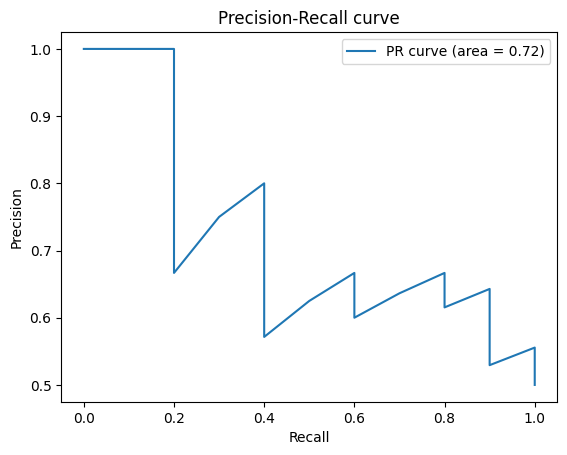

Area under the Precision-Recall curve: 0.72


In [3]:
import pandas as pd
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt
import numpy as np

ranks = np.arange(1, 21)
labels = ['R', 'R', 'NR', 'R', 'R', 'NR','NR', 'R', 'R','NR',
          'R','R','NR','R','NR','NR','NR','R', 'NR', 'NR',]

df = pd.DataFrame({'Rank': ranks, 'Label': labels})

# Convert labels to binary format: R -> 1, NR -> 0
df['binary_label'] = df['Label'].map({'R': 1, 'NR': 0})

# Create predicted scores based on the rank
# Lower rank means higher relevance
df['score'] = -df['Rank']

# Compute Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(df['binary_label'], df['score'])

# Compute AUC for the Precision-Recall curve
pr_auc = auc(recall, precision)


plt.figure()
plt.plot(recall, precision, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="best")
plt.savefig('precision_recall_curve.jpg', format='jpeg', bbox_inches='tight')
plt.show()

# Print the AUC
print(f'Area under the Precision-Recall curve: {pr_auc:.2f}')




In [10]:
# Calculate precision and recall for each rank
ranks = np.arange(1, 11)
labels = ['R', 'R', 'NR', 'R', 'R', 'NR','NR', 'R', 'NR','NR']

df = pd.DataFrame({'Rank': ranks, 'Label': labels})

# Convert labels to binary format: R -> 1, NR -> 0
df['binary_label'] = df['Label'].map({'R': 1, 'NR': 0})


precisions = []
recalls = []
for i in range(1, len(df) + 1):
    sub_df = df.iloc[:i]
    tp = sum(sub_df['binary_label'])
    fp = i - tp
    fn = sum(df['binary_label']) - tp
    
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    
    precisions.append(precision)
    recalls.append(recall)

df['precision'] = precisions
df['recall'] = recalls
df

,Rank,Label,binary_label,precision,recall
0,1,R,1,1.000000,0.2
1,2,R,1,1.000000,0.4
2,3,NR,0,0.666667,0.4
3,4,R,1,0.750000,0.6
4,5,R,1,0.800000,0.8
5,6,NR,0,0.666667,0.8
6,7,NR,0,0.571429,0.8
7,8,R,1,0.625000,1.0
8,9,NR,0,0.555556,1.0
9,10,NR,0,0.500000,1.0


# A RAG pipeline

In [1]:
import pandas as pd
df = pd.read_csv('movies_metadata.csv')
df.head()

/var/tmp/ipykernel_10788/1841053763.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('movies_metadata.csv')


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [2]:

import pandas as pd
from sentence_transformers import SentenceTransformer
from langchain.text_splitter import NLTKTextSplitter
import chromadb

df = df[['original_title', 'overview']]

# Step 1: Chunk the Overview Column using NLTKTextSplitter
text_splitter = NLTKTextSplitter(chunk_size=1500)

def split_overview(overview):
    if pd.isna(overview):
        return []
    return text_splitter.split_text(str(overview))

df['chunks'] = df['overview'].apply(split_overview)

# Flatten the dataframe for easier processing
chunked_df = df.explode('chunks').reset_index(drop=True)

# Step 2: Embed with a SentenceTransformer Encoder
embedder = SentenceTransformer('all-MiniLM-L6-v2')  # You can choose another model

# Make sure all chunks are strings and not empty
def encode_chunk(chunk):
    if not isinstance(chunk, str) or chunk.strip() == "":
        return None
    return embedder.encode(chunk).tolist()

chunked_df['embeddings'] = chunked_df['chunks'].apply(encode_chunk)

# Drop rows where 'embeddings' is None
chunked_df.dropna(subset=['embeddings'], inplace=True)

# Step 3: Store in ChromaDB
# Initialize ChromaDB client and collection
client = chromadb.Client()
collection = client.create_collection(name='movies')

# Insert data into ChromaDB
for idx, row in chunked_df.iterrows():
    collection.add(
        ids=[str(idx)],
        embeddings=[row['embeddings']],
        metadatas=[{
            'original_title': row['original_title'],
            'chunk': row['chunks']
        }]
    )

print("Data successfully stored in ChromaDB.")


/opt/conda/lib/python3.10/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


Data successfully stored in ChromaDB.


In [7]:
import transformers
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline
from chromadb import Client
from sentence_transformers import SentenceTransformer
import chromadb
import torch

# Load the SentenceTransformer model for encoding queries
sentence_model = SentenceTransformer('all-MiniLM-L6-v2')  # Use the same model as for embedding documents

# Load the text generation model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("mistralai/Mistral-7B-Instruct-v0.1")
model = AutoModelForCausalLM.from_pretrained(
    "mistralai/Mistral-7B-Instruct-v0.1",
    device_map='auto' # load it in the current GPU
)
text_generation_pipeline = pipeline(
    model=model,
    tokenizer=tokenizer,
    task="text-generation",
    return_full_text=True,
    max_new_tokens=800
)


# Function to retrieve top_k documents from ChromaDB
def retrieve_documents(query, collection, top_k=5):
    # Embed the query using the SentenceTransformer model
    query_embedding = sentence_model.encode(query).tolist()
    
    # Search for top_k similar documents in the collection
    results = collection.query(
        query_embeddings=[query_embedding],
        n_results=top_k
    )
    
    if not results['documents']:
        print("No results found for the query.")
        return [], []
    
    # Extract chunks and titles from the results
    chunks = []
    titles = []
    for document in results['metadatas'][0]:
        chunks.append(document['chunk'])
        titles.append(document['original_title'])
    
    return chunks, titles

# Function to generate answer based on retrieved chunks and titles
def generate_answer(query, chunks, titles, text_generation_pipeline):
    # Prepare the context from chunks and titles
    context = "\n\n".join([f"Title: {title}\nChunk: {chunk}" for title, chunk in zip(titles, chunks)])
    
    # Prepare the prompt
    prompt = f"""[INST]
    Instruction: You're an expert in movie suggestions. Your task is to analyze carefully the context and come up with an exhaustive answer to the following question:
    {query}
    
    Here is the context to help you:

    {context}

    [/INST]"""
    
    # Generate the answer using the model
    generated_text = text_generation_pipeline(prompt)[0]['generated_text']
    
    return generated_text

# Example usage
client = chromadb.Client()
collection = client.get_collection(name='movies')

query = "What are some good movies to watch on a rainy day?"
top_k = 5

# Retrieve documents
chunks, titles = retrieve_documents(query, collection, top_k)
print(f"Retrieved Chunks: {chunks}")
print(f"Retrieved Titles: {titles}")




Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieved Chunks: ['In DISASTER MOVIE, the filmmaking team behind the hits "Scary Movie," "Date Movie," "Epic Movie" and "Meet The Spartans" this time puts its unique, inimitable stamp on one of the biggest and most bloated movie genres of all time -- the disaster film.', 'The film talks about a family that weathers all sorts of disasters and keeps going in spite of it all.\n\nIt is noted for its wonderful assortment of oddball characters.', 'Silent comedy about a poor country bumpkin who goes to Hollywood to make good.', "There are some movies that are so bad they're good.\n\nAnd there are some movies that are so bad- that they're just bad...", 'A funny musical comedy about an adventures of children and adults in a summer camp.']
Retrieved Titles: ['Disaster Movie', 'The Hotel New Hampshire', 'The Movies', 'The 50 Worst Movies Ever Made', 'Завтрак на траве']


In [8]:
# Generate answer
if chunks and titles:
    answer = generate_answer(query, chunks, titles, text_generation_pipeline)
    print(answer)
else:
    print("No relevant documents found to generate an answer.")

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


[INST]
    Instruction: You're an expert in movie suggestions. Your task is to analyze carefully the context and come up with an exhaustive answer to the following question:
    What are some good movies to watch on a rainy day?
    
    Here is the context to help you:

    Title: Disaster Movie
Chunk: In DISASTER MOVIE, the filmmaking team behind the hits "Scary Movie," "Date Movie," "Epic Movie" and "Meet The Spartans" this time puts its unique, inimitable stamp on one of the biggest and most bloated movie genres of all time -- the disaster film.

Title: The Hotel New Hampshire
Chunk: The film talks about a family that weathers all sorts of disasters and keeps going in spite of it all.

It is noted for its wonderful assortment of oddball characters.

Title: The Movies
Chunk: Silent comedy about a poor country bumpkin who goes to Hollywood to make good.

Title: The 50 Worst Movies Ever Made
Chunk: There are some movies that are so bad they're good.

And there are some movies that are